<a href="https://colab.research.google.com/github/MariaSanSal/Tarea_PIA07/blob/main/Tarea_PIA07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea online PIA07
##Programación de una Red Neuronal Convolucional
##Apartado 1: Carga el dataset y prepara los datos







In [73]:
import tensorflow as tf
from tensorflow import keras
from tf_keras.datasets import mnist #this library contains a lot of ML datasets including the MNIST one
from keras import optimizers
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense


import numpy as np

input_shape = (28, 28, 6)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#(train_data, train_labels), (test_data, test_labels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
test_data = X_test.astype('float32')

X_train /= 255
test_data /= 255
y_train, y_test = y_train.flatten(), y_test.flatten()

In [65]:
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


In [74]:
from tf_keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

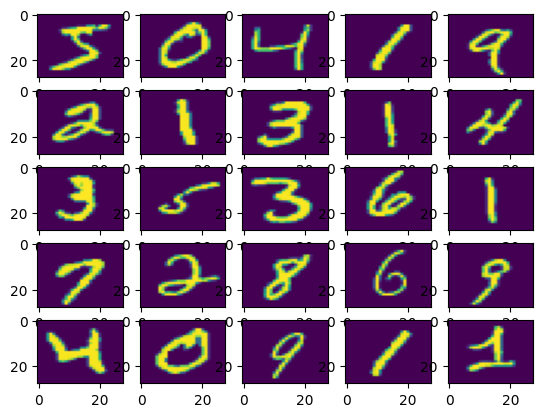

In [75]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(X_train[k], aspect='auto')
        k += 1

plt.show()

##Apartado 2: Crea el modelo convolucional
* Crea un modelo con una o varias capas Conv2D.
* Utiliza también capas max-pooling o strides que mantengan las dimensiones de la red bajo control.
* Recuerda añadir una capa neuronal interna y una capa neuronal de salida, con tantas neuronas como clases de salida necesitamos.


In [86]:
import keras
model = Sequential()
model.add(Conv2D(28, kernel_size=(5,5), input_shape = input_shape,activation="sigmoid"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(28, kernel_size=(5,5),activation="sigmoid"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(120,activation="sigmoid"))
model.add(Dense(84,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 24, 24, 28)        728       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 12, 12, 28)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 28)          19628     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 4, 4, 28)          0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 448)               0         
                                                                 
 dropout_8 (Dropout)         (None, 448)              

In [87]:
model.compile(optimizer= 'Adam', loss = 'categorical_crossentropy',metrics=['acc'])
model.fit(X_train, y_train, batch_size=256, epochs = 10, validation_data = (X_test, y_test))


Epoch 1/10
235/235 [==============================] - 47s 194ms/step - loss: 1.7918 - acc: 0.3989 - val_loss: 1.0949 - val_acc: 0.6418
Epoch 2/10
235/235 [==============================] - 45s 193ms/step - loss: 0.4378 - acc: 0.8823 - val_loss: 0.3597 - val_acc: 0.8933
Epoch 3/10
235/235 [==============================] - 45s 194ms/step - loss: 0.2451 - acc: 0.9283 - val_loss: 0.2180 - val_acc: 0.9319
Epoch 4/10
235/235 [==============================] - 44s 188ms/step - loss: 0.1862 - acc: 0.9447 - val_loss: 0.1713 - val_acc: 0.9475
Epoch 5/10
235/235 [==============================] - 44s 189ms/step - loss: 0.1567 - acc: 0.9527 - val_loss: 0.1319 - val_acc: 0.9595
Epoch 6/10
235/235 [==============================] - 45s 193ms/step - loss: 0.1365 - acc: 0.9581 - val_loss: 0.1034 - val_acc: 0.9657
Epoch 7/10
235/235 [==============================] - 44s 188ms/step - loss: 0.1226 - acc: 0.9624 - val_loss: 0.0920 - val_acc: 0.9724
Epoch 8/10
235/235 [==============================] - 4

In [88]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0646 - acc: 0.9792

Test accuracy: 0.979200005531311


313/313 [==============================] - 2s 8ms/step


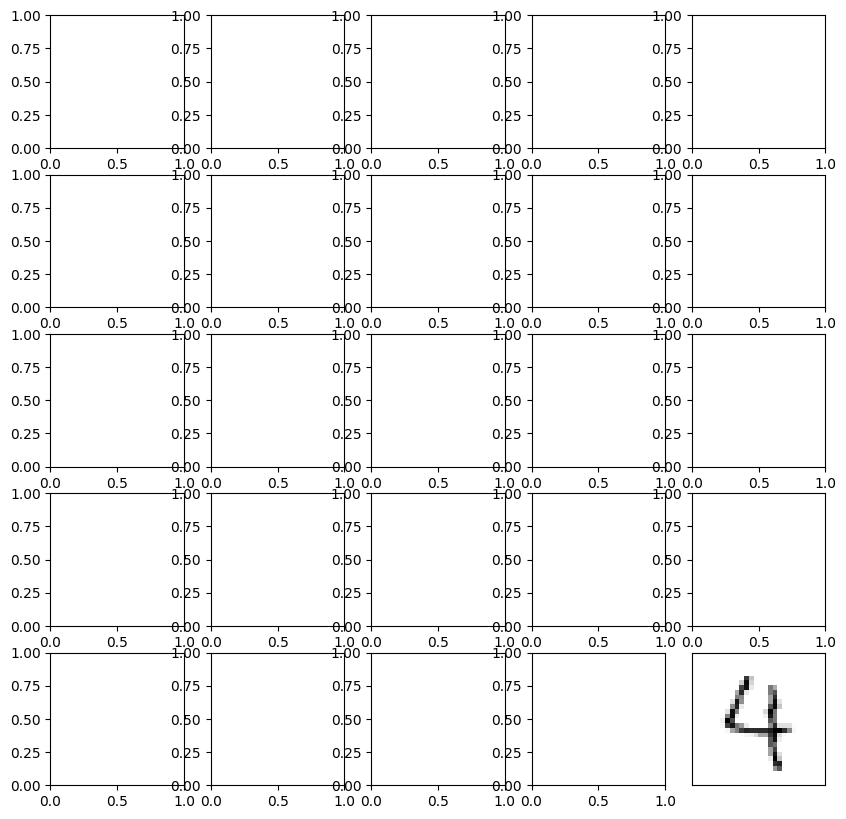

In [89]:
import matplotlib.pyplot as plt
predictions=model.predict(X_test)


plt.figure(figsize=(10,10))
for i in range(25):
 plt.subplot(5,5,i+1)
plt.xticks([])
plt.yticks([])
plt.grid('off')
plt.imshow(X_test[i],cmap=plt.cm.binary)
predicted_label=predictions[i]
true_label=y_test[i]

